In [ ]:
import tensorflow as tf
import os
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/My Drive/Dataset/'

# Directories for each class
train_dir = f'{base_dir}/train'
validation_dir = f'{base_dir}/valid'



In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

# YOUR IMAGE SIZE SHOULD BE 150x150
train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(150, 150))

validation_datagen = ImageDataGenerator(rescale=1./255)

# Pass in the appropriate arguments to the flow_from_directory method
validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                                                  batch_size=32,
                                                                  class_mode='categorical',
                                                                  target_size=(150, 150))


Found 350 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 17, 17, 128)      

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.95:
            print("\nReached 95% accuracy, stopping training")
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/50
11/11 - 6s - loss: 1.6266 - accuracy: 0.2486 - val_loss: 1.4586 - val_accuracy: 0.3100 - 6s/epoch - 506ms/step
Epoch 2/50
11/11 - 6s - loss: 1.3968 - accuracy: 0.3686 - val_loss: 1.3890 - val_accuracy: 0.4000 - 6s/epoch - 527ms/step
Epoch 3/50
11/11 - 4s - loss: 1.2764 - accuracy: 0.4371 - val_loss: 1.0188 - val_accuracy: 0.5500 - 4s/epoch - 372ms/step
Epoch 4/50
11/11 - 4s - loss: 1.1875 - accuracy: 0.4314 - val_loss: 1.1417 - val_accuracy: 0.5200 - 4s/epoch - 377ms/step
Epoch 5/50
11/11 - 5s - loss: 1.2077 - accuracy: 0.4371 - val_loss: 0.9740 - val_accuracy: 0.6100 - 5s/epoch - 498ms/step
Epoch 6/50
11/11 - 4s - loss: 1.1340 - accuracy: 0.4714 - val_loss: 0.9802 - val_accuracy: 0.5300 - 4s/epoch - 375ms/step
Epoch 7/50
11/11 - 4s - loss: 1.1395 - accuracy: 0.4800 - val_loss: 0.9442 - val_accuracy: 0.4900 - 4s/epoch - 385ms/step
Epoch 8/50
11/11 - 6s - loss: 1.0444 - accuracy: 0.5171 - val_loss: 0.9019 - val_accuracy: 0.6200 - 6s/epoch - 503ms/step
Epoch 9/50
11/11 - 4s - 

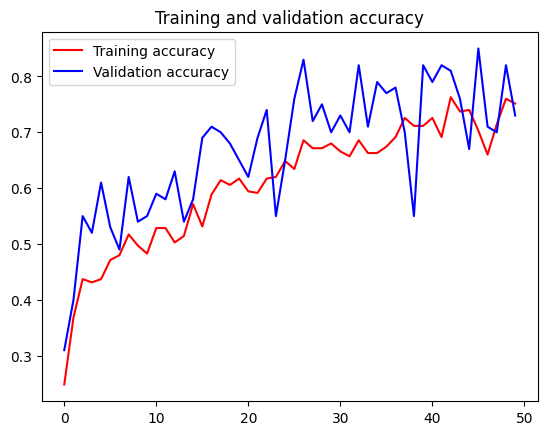

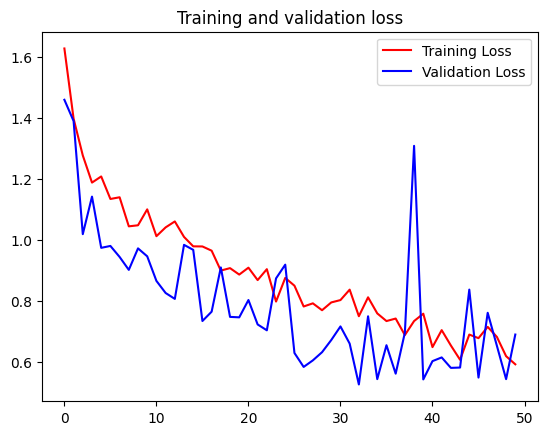

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files
from PIL import Image
import io

def preprocess_image(uploaded_file):
    img = Image.open(uploaded_file)
    img = img.resize((150, 150))  # Resize the image to 150x150 pixels
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
    img_array /= 255.0  # Normalize the image array
    return img_array



In [ ]:
def make_prediction(uploaded_file):
    img_array = preprocess_image(uploaded_file)
    prediction = model.predict(img_array)
    return prediction

Saving traditional-indonesian-culinary-food-masakan-260nw-1250608585_jpg.rf.a58d3c949de24845f776eceddd8f5a74.jpg to traditional-indonesian-culinary-food-masakan-260nw-1250608585_jpg.rf.a58d3c949de24845f776eceddd8f5a74.jpg


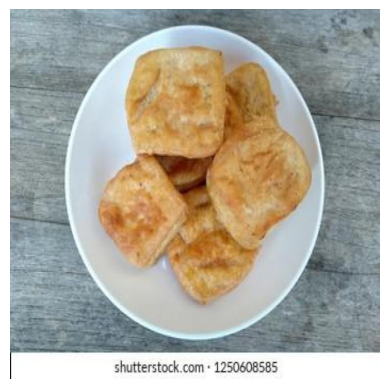

1/1 [==============================] - 0s 42ms/step
The image is predicted to be tahu with a confidence of 0.45


In [ ]:
# Define the class labels
class_labels = ['ayam', 'nasi', 'tahu', 'telur', 'tempe']

# Upload a file
uploaded = files.upload()

for file_name in uploaded.keys():
    # Open and display the image
    uploaded_file = io.BytesIO(uploaded[file_name])
    img = Image.open(uploaded_file)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Make a prediction
    prediction = make_prediction(uploaded_file)
    predicted_class = np.argmax(prediction, axis=1)[0]
    confidence = np.max(prediction)

    # Display the prediction
    print(f'The image is predicted to be {class_labels[predicted_class]} with a confidence of {confidence:.2f}')
